# **PROJETO ANÁLISE ESTATÍSTICA DO ENEM 2019**

Este projeto analisa os resultados do ENEM no estado de São Paulo do ano de 2019.

Os dados foram extraídos do site do INEP:

http://inep.gov.br/microdados

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
import pandas as pd

dados = pd.read_csv('microdados_enem_2019_sp.csv', sep=';', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## Extração e Limpeza dos dados

In [3]:
pd.options.display.max_columns = 44

In [4]:
dados.head()


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,5646.0,5858.0,5929.0,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,1,1,1,1,5762.0,6411.0,6343.0,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,1,1,1,1,4022.0,4248.0,5096.0,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [5]:
dados.shape
#indica o número de linhas e colunas do dataframe

(813772, 44)

In [6]:
dados.dtypes
#analise de tipos de dados
#object: string
#float64: ponto flutuante
#int64: inteiros
#complex: complexos

NU_INSCRICAO                object
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                     int64
TP_SEXO                     object
TP_ESTADO_CIVIL              int64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
CO_MUNICIPIO_NASCIMENTO    float64
NO_MUNICIPIO_NASCIMENTO     object
CO_UF_NASCIMENTO           float64
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
IN_TREINEIRO                 int64
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
NO_MUNICIPIO_ESC            object
CO_UF_ESC                  float64
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
TP_SIT_FUNC_ESC            float64
TP_PRESENCA_CN               int64
TP_PRESENCA_CH      

In [7]:
Dados1 = dados.drop(columns=['CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO', 'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', ])
# exclui colunas que não serão utilizadas

In [8]:
Dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,3,Santa Izabel do Pará,15.0,PA,1,0,NaN,NaN,1,1,1,1,5646.0,5858.0,5929.0,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,3,Jacundá,15.0,PA,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,SP,17,F,1,3,Belém,15.0,PA,3,0,15567761.0,Belém,1,1,1,1,5762.0,6411.0,6343.0,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,3,São Bernardo do Campo,35.0,SP,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,4022.0,4248.0,5096.0,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,1,São Joaquim da Barra,35.0,SP,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [9]:
Dados1.loc[: , 'NU_NOTA_CH'] /=10
Dados1.loc[: , 'NU_NOTA_CN'] /=10
Dados1.loc[: , 'NU_NOTA_LC'] /=10   
Dados1.loc[: , 'NU_NOTA_MT'] /=10
#divisão por 10 para adequar as notas ao padrão do ENEM
#.loc: localiza elementos no dataframe


In [10]:
Dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,3,Santa Izabel do Pará,15.0,PA,1,0,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,3,Jacundá,15.0,PA,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,SP,17,F,1,3,Belém,15.0,PA,3,0,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,3,São Bernardo do Campo,35.0,SP,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,1,São Joaquim da Barra,35.0,SP,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [11]:
Dados1 = Dados1.rename( columns = {'NU_NOTA_CN': 'Nota Ciências da Natureza', 'NU_NOTA_CH': 'Nota Ciências Humanas', 'NU_NOTA_LC': 'Nota Linguagens e Códigos', 'NU_NOTA_MT': 'Nota Matemática', 'NU_NOTA_REDACAO': 'Nota Redação'})
#renomeia as colunas
#colocar chaves para indicar o nome antigo e o novo


In [12]:
Dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,3,Santa Izabel do Pará,15.0,PA,1,0,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,3,Jacundá,15.0,PA,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,SP,17,F,1,3,Belém,15.0,PA,3,0,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,3,São Bernardo do Campo,35.0,SP,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,1,São Joaquim da Barra,35.0,SP,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [13]:
Dados1 = Dados1.rename( columns = {'NU_IDADE': 'Idade', 'TP_SEXO': 'Sexo', 'TP_COR_RACA': 'Cor/Raça', 'TP_ESTADO_CIVIL': 'Estado Civil', 'TP_ESCOLA': 'Tipo de Escola', 'TP_ENSINO': 'Tipo de Ensino', 'NU_NOTA_CN': 'Nota Ciências da Natureza', 'NU_NOTA_CH': 'Nota Ciências Humanas', 'NU_NOTA_LC': 'Nota Linguagens e Códigos', 'NU_NOTA_MT': 'Nota Matemática', 'NU_NOTA_REDACAO': 'Nota Redação', 'TP_LINGUA': 'Lingua Estrangeira', })

#renomeia as colunas pt2

In [14]:
Dados1 = Dados1.rename(columns={
    'TP_PRESENCA_CN': 'Presença Ciências da Natureza',
    'TP_PRESENCA_CH': 'Presença Ciências Humanas',
    'TP_PRESENCA_LC': 'Presença Linguagens e Códigos',
    'TP_PRESENCA_MT': 'Presença Matemática'
})

In [15]:
Dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,3,Santa Izabel do Pará,15.0,PA,1,0,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,3,Jacundá,15.0,PA,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,SP,17,F,1,3,Belém,15.0,PA,3,0,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,3,São Bernardo do Campo,35.0,SP,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,1,São Joaquim da Barra,35.0,SP,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [16]:
Dados1['Cor/Raça']= Dados1['Cor/Raça'].replace({0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})
#coloca a legenda para as cores/raças
#replace: substitui valores

In [17]:
Dados1.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,Parda,Santa Izabel do Pará,15.0,PA,1,0,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,Parda,Jacundá,15.0,PA,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,SP,17,F,1,Parda,Belém,15.0,PA,3,0,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,Parda,São Bernardo do Campo,35.0,SP,2,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,Branca,São Joaquim da Barra,35.0,SP,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
5,"1,90E+11",Embu-Guaçu,SP,17,F,1,Parda,Itacoatiara,13.0,AM,2,0,NaN,NaN,1,1,1,1,399.6,426.8,487.2,419.2,0,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B
6,"1,90E+11",São José dos Campos,SP,28,F,1,Branca,Manaus,13.0,AM,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
7,"1,90E+11",São José dos Campos,SP,25,F,2,Branca,São José dos Campos,35.0,SP,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
8,"1,90E+11",Guarulhos,SP,23,F,1,Branca,São Paulo,35.0,SP,1,0,NaN,NaN,1,1,1,1,625.7,646.5,629.3,796.1,0,1.0,160.0,200.0,180.0,180.0,160.0,880.0,B
9,"1,90E+11",São Paulo,SP,19,F,1,Parda,Belém,15.0,PA,1,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [18]:
Dados1['Lingua Estrangeira']= Dados1['Lingua Estrangeira'].replace({0: 'Inglês', 1: 'Espanhol'})

In [19]:
Dados1['Tipo de Escola'] = Dados1['Tipo de Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})

In [20]:
Dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,Parda,Santa Izabel do Pará,15.0,PA,Não Respondeu,0,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,Parda,Jacundá,15.0,PA,Não Respondeu,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,SP,17,F,1,Parda,Belém,15.0,PA,Privada,0,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,Parda,São Bernardo do Campo,35.0,SP,Pública,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,Branca,São Joaquim da Barra,35.0,SP,Não Respondeu,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [21]:
Dados1 = Dados1.fillna('não informado')
Dados1.head(10)
#substitui valores nulos por 'não informado'
#fillna: preenche valores nulos


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,Parda,Santa Izabel do Pará,15.0,PA,Não Respondeu,0,não informado,não informado,1,1,1,1,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,Parda,Jacundá,15.0,PA,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,A
2,"1,90E+11",São Paulo,SP,17,F,1,Parda,Belém,15.0,PA,Privada,0,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,Parda,São Bernardo do Campo,35.0,SP,Pública,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,Branca,São Joaquim da Barra,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
5,"1,90E+11",Embu-Guaçu,SP,17,F,1,Parda,Itacoatiara,13.0,AM,Pública,0,não informado,não informado,1,1,1,1,399.6,426.8,487.2,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B
6,"1,90E+11",São José dos Campos,SP,28,F,1,Branca,Manaus,13.0,AM,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,A
7,"1,90E+11",São José dos Campos,SP,25,F,2,Branca,São José dos Campos,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
8,"1,90E+11",Guarulhos,SP,23,F,1,Branca,São Paulo,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,625.7,646.5,629.3,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,B
9,"1,90E+11",São Paulo,SP,19,F,1,Parda,Belém,15.0,PA,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B


In [22]:
Dados1['Idade'].value_counts()
#conta a quantidade de cada valor

Idade
17    219313
18    147548
19     81236
16     59316
20     53009
       ...  
86         1
4          1
3          1
91         1
2          1
Name: count, Length: 80, dtype: int64

In [23]:
menores_12= Dados1.query('Idade < 12') ['NO_MUNICIPIO_RESIDENCIA'].value_counts()
#query: seleciona valores que atendem a condição
#conta a quantidade de pessoas com menos de 12 anos por cidade

In [24]:
menores_12
#inscrinções de pessoas com menos de 12 anos serão excluídas da análise

NO_MUNICIPIO_RESIDENCIA
São Paulo                 5
Tambaú                    1
Ribeirão Preto            1
Bálsamo                   1
São Bernardo do Campo     1
Embu das Artes            1
Queiroz                   1
Santana de Parnaíba       1
Vargem Grande Paulista    1
Auriflama                 1
Araçatuba                 1
Campinas                  1
Name: count, dtype: int64

In [25]:
Dados1= Dados1.loc[Dados1['Idade'] > 11]

In [26]:
Dados1['Idade'].value_counts()

Idade
17    219313
18    147548
19     81236
16     59316
20     53009
       ...  
78         3
82         2
80         2
91         1
86         1
Name: count, Length: 73, dtype: int64

In [27]:
Dados1.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts()
#conta a quantidade de treineiros
# ==1 indica que é treineiro e ==0 indica que não é treineiro 



IN_TREINEIRO
1    93988
Name: count, dtype: int64

In [28]:
treineiros = Dados1.loc[Dados1['IN_TREINEIRO'] == 1]
#seleciona os treineiros e cria uma nova tabela só com eles

In [29]:
treineiros.to_csv('Enem2019_Treineiros.csv', encoding='iso-8859-1', index=False)
#salva a tabela com os treineiros em um arquivo csv


In [30]:
vestibulandos = Dados1.loc[Dados1['IN_TREINEIRO'] == 0]
#seleciona os vestibulandos e cria uma nova tabela só com eles 

In [31]:
vestibulandos.to_csv('Enem2019_Vestibulandos.csv', encoding='iso-8859-1', index=False)
#salva a tabela com os vestibulandos em um arquivo csv

In [32]:
vestibulandos.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,Parda,Santa Izabel do Pará,15.0,PA,Não Respondeu,0,não informado,não informado,1,1,1,1,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,Parda,Jacundá,15.0,PA,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,A
2,"1,90E+11",São Paulo,SP,17,F,1,Parda,Belém,15.0,PA,Privada,0,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,Parda,São Bernardo do Campo,35.0,SP,Pública,0,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,Branca,São Joaquim da Barra,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B


In [33]:
vestibulandos['Tipo de Escola'] = vestibulandos['Tipo de Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})

C:\Users\jp\AppData\Local\Temp\ipykernel_12672\831292331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vestibulandos['Tipo de Escola'] = vestibulandos['Tipo de Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})


In [34]:
vestibulandos = vestibulandos.rename(columns={
    'TP_PRESENCA_CN': 'Presença Ciências da Natureza',
    'TP_PRESENCA_CH': 'Presença Ciências Humanas',
    'TP_PRESENCA_LC': 'Presença Linguagens e Códigos',
    'TP_PRESENCA_MT': 'Presença Matemática'
})
#renomeia as colunas da tabela vestibulandos

In [35]:
vestibulandos['Presença Ciências da Natureza'] = vestibulandos['Presença Ciências da Natureza'].replace({0: 'Faltou', 1: 'Presente', 2: 'Eliminado'})
vestibulandos['Presença Ciências Humanas'] = vestibulandos['Presença Ciências Humanas'].replace({0: 'Faltou', 1: 'Presente', 2: 'Eliminado'})
vestibulandos['Presença Linguagens e Códigos'] = vestibulandos['Presença Linguagens e Códigos'].replace({0: 'Faltou', 1: 'Presente', 2: 'Eliminado'})
vestibulandos['Presença Matemática'] = vestibulandos['Presença Matemática'].replace({0: 'Faltou', 1: 'Presente',2 : 'Eliminado'})
#substitui os valores 0 por 'Faltou' e 1 por 'Presente' e 2 por 'Eliminado'



In [36]:
vestibulandos.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,Parda,Santa Izabel do Pará,15.0,PA,Não Respondeu,0,não informado,não informado,Presente,Presente,Presente,Presente,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,SP,19,M,1,Parda,Jacundá,15.0,PA,Não Respondeu,0,não informado,não informado,Faltou,Faltou,Faltou,Faltou,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,A
2,"1,90E+11",São Paulo,SP,17,F,1,Parda,Belém,15.0,PA,Privada,0,15567761.0,Belém,Presente,Presente,Presente,Presente,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,Parda,São Bernardo do Campo,35.0,SP,Pública,0,35904958.0,São Bernardo do Campo,Presente,Presente,Presente,Presente,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,SP,37,M,2,Branca,São Joaquim da Barra,35.0,SP,Não Respondeu,0,não informado,não informado,Faltou,Faltou,Faltou,Faltou,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B


In [37]:
vestibulandos['Presença Ciências Humanas'  ].value_counts()
#conta a quantidade de presentes, faltas e eliminados na prova de Ciências Humanas

Presença Ciências Humanas
Presente     533142
Faltou       185969
Eliminado       657
Name: count, dtype: int64

In [38]:
vestibulandos['Presença Ciências da Natureza'  ].value_counts()
#conta a quantidade de presentes, faltas e eliminados na prova de Ciências da Natureza

Presença Ciências da Natureza
Presente     500805
Faltou       218693
Eliminado       270
Name: count, dtype: int64

In [39]:
vestibulandos['Presença Linguagens e Códigos'  ].value_counts()
#conta a quantidade de presentes, faltas e eliminados na prova de Linguagens e Códigos


Presença Linguagens e Códigos
Presente     533142
Faltou       185969
Eliminado       657
Name: count, dtype: int64

In [40]:
vestibulandos['Presença Matemática'  ].value_counts()
#conta a quantidade de presentes, faltas e eliminados na prova de Matemática


Presença Matemática
Presente     500805
Faltou       218693
Eliminado       270
Name: count, dtype: int64

Observação: Notamos uma discrepância no número de presenças registradas nas quatro áreas avaliadas no ENEM. Isso ocorreu porque as provas foram aplicadas em dias distintos, com duas áreas sendo avaliadas por dia.

In [41]:
vestibulandos['TP_STATUS_REDACAO']= vestibulandos['TP_STATUS_REDACAO'].replace({1: 'Sem problemas', 2: 'Anulada', 3: 'Cópia texto motivador', 4: 'Em branco', 6: 'Fuga ao tema', 7: 'Não atendimento ao tipo textual', 8: 'Texto insuficiente', 9: 'Parte desconectada'})
#Substitui os valores por legenda para facilitar a analise dos participantes na hora da redação 

In [42]:
vestibulandos['TP_STATUS_REDACAO'].value_counts()
#conta a quantidade de cada legenda 

TP_STATUS_REDACAO
Sem problemas                      519763
não informado                      186626
Em branco                            5513
Fuga ao tema                         3626
Cópia texto motivador                1417
Anulada                               913
Texto insuficiente                    828
Não atendimento ao tipo textual       543
Parte desconectada                    539
Name: count, dtype: int64

In [43]:
vestibulandos_presentes = vestibulandos.query('`Presença Ciências Humanas` == "Presente" and `Presença Ciências da Natureza` == "Presente" and `Presença Linguagens e Códigos` == "Presente" and `Presença Matemática` == "Presente"')
#seleciona os participantes que estavam presentes em todas as provas

In [44]:
vestibulandos_presentes['Tipo de Escola'] = vestibulandos_presentes['Tipo de Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})

C:\Users\jp\AppData\Local\Temp\ipykernel_12672\4287531444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vestibulandos_presentes['Tipo de Escola'] = vestibulandos_presentes['Tipo de Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})


In [45]:
vestibulandos_presentes.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,Parda,Santa Izabel do Pará,15.0,PA,Não Respondeu,0,não informado,não informado,Presente,Presente,Presente,Presente,564.6,585.8,592.9,600.2,Inglês,Sem problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
2,"1,90E+11",São Paulo,SP,17,F,1,Parda,Belém,15.0,PA,Privada,0,15567761.0,Belém,Presente,Presente,Presente,Presente,576.2,641.1,634.3,731.8,Inglês,Sem problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,Parda,São Bernardo do Campo,35.0,SP,Pública,0,35904958.0,São Bernardo do Campo,Presente,Presente,Presente,Presente,402.2,424.8,509.6,393.2,Espanhol,Sem problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
5,"1,90E+11",Embu-Guaçu,SP,17,F,1,Parda,Itacoatiara,13.0,AM,Pública,0,não informado,não informado,Presente,Presente,Presente,Presente,399.6,426.8,487.2,419.2,Inglês,Sem problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
8,"1,90E+11",Guarulhos,SP,23,F,1,Branca,São Paulo,35.0,SP,Não Respondeu,0,não informado,não informado,Presente,Presente,Presente,Presente,625.7,646.5,629.3,796.1,Inglês,Sem problemas,160.0,200.0,180.0,180.0,160.0,880.0,B


In [46]:
vestibulandos_presentes.to_csv('Enem2019_Vestibulandos_Presentes.csv', encoding='iso-8859-1', index=False)
#salva a tabela com os vestibulandos presentes em todas as provas em um arquivo csv

In [47]:
vestibulandos_presentes['Nota Ciências Humanas'].value_counts()
#conta a quantidade de cada nota na prova de Ciências Humanas

Nota Ciências Humanas
0.0      343
54.3     309
55.4     305
534.6    303
542.2    302
        ... 
785.5      1
765.5      1
812.7      1
316.7      1
774.6      1
Name: count, Length: 4549, dtype: int64

In [48]:
vestibulandos_presentes['NO_MUNICIPIO_RESIDENCIA'].isnull().sum()
#conta a quantidade de valores nulos na coluna 'NO_MUNICIPIO_RESIDENCIA'

np.int64(0)

In [49]:
vestibulandos_presentes['Nota Ciências Humanas'].isnull().sum()
#conta a quantidade de valores nulos na coluna 'Nota Ciências Humanas'

np.int64(0)

In [50]:
vestibulandos_presentes['Nota Redação'].isnull().sum()
#conta a quantidade de valores nulos na coluna 'Nota Redação'
#isnull: verifica se o valor é nulo
#sum: soma os valores nulos
# Não há valores nulos nas notas dessa tabela pois só foram selecionados os participantes que estavam presentes em todas as provas

np.int64(0)

In [51]:
provas = ['Nota Ciências Humanas', 'Nota Ciências da Natureza', 'Nota Linguagens e Códigos', 'Nota Matemática', 'Nota Redação']
#cria uma lista com as colunas das notas

In [52]:
vestibulandos.apply(lambda x: x.value_counts().get('não informado', 0))
#conta a quantidade de valores 'não informado' em cada coluna
#apply: aplica uma função a cada coluna
#lambda: função anônima
#x: cada coluna
#value_counts: conta a quantidade de cada valor
#get: pega o valor 'não informado'
#0: valor padrão caso não exista o valor 'não informado'

NU_INSCRICAO                          0
NO_MUNICIPIO_RESIDENCIA               0
SG_UF_RESIDENCIA                      0
Idade                                 0
Sexo                                  0
Estado Civil                          0
Cor/Raça                              0
NO_MUNICIPIO_NASCIMENTO           17697
CO_UF_NASCIMENTO                  17697
SG_UF_NASCIMENTO                  17697
Tipo de Escola                        0
IN_TREINEIRO                          0
CO_ESCOLA                        500483
NO_MUNICIPIO_ESC                 500483
Presença Ciências da Natureza         0
Presença Ciências Humanas             0
Presença Linguagens e Códigos         0
Presença Matemática                   0
Nota Ciências da Natureza        218963
Nota Ciências Humanas            186626
Nota Linguagens e Códigos        186626
Nota Matemática                  218963
Lingua Estrangeira                    0
TP_STATUS_REDACAO                186626
NU_NOTA_COMP1                    186626


In [53]:
vestibulandos[provas].apply(lambda x: x.value_counts().get('não informado', 0))
#conta a quantidade de valores 'não informado' em cada coluna de notas


Nota Ciências Humanas        186626
Nota Ciências da Natureza    218963
Nota Linguagens e Códigos    186626
Nota Matemática              218963
Nota Redação                 186626
dtype: int64

In [54]:
vestibulandos_presentes.head()


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
0,"1,90E+11",Santa Isabel,SP,22,M,1,Parda,Santa Izabel do Pará,15.0,PA,Não Respondeu,0,não informado,não informado,Presente,Presente,Presente,Presente,564.6,585.8,592.9,600.2,Inglês,Sem problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
2,"1,90E+11",São Paulo,SP,17,F,1,Parda,Belém,15.0,PA,Privada,0,15567761.0,Belém,Presente,Presente,Presente,Presente,576.2,641.1,634.3,731.8,Inglês,Sem problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,SP,19,M,1,Parda,São Bernardo do Campo,35.0,SP,Pública,0,35904958.0,São Bernardo do Campo,Presente,Presente,Presente,Presente,402.2,424.8,509.6,393.2,Espanhol,Sem problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
5,"1,90E+11",Embu-Guaçu,SP,17,F,1,Parda,Itacoatiara,13.0,AM,Pública,0,não informado,não informado,Presente,Presente,Presente,Presente,399.6,426.8,487.2,419.2,Inglês,Sem problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
8,"1,90E+11",Guarulhos,SP,23,F,1,Branca,São Paulo,35.0,SP,Não Respondeu,0,não informado,não informado,Presente,Presente,Presente,Presente,625.7,646.5,629.3,796.1,Inglês,Sem problemas,160.0,200.0,180.0,180.0,160.0,880.0,B


In [55]:
vestibulandos_presentes.query('`Nota Redação` == 0')['Nota Redação'].value_counts()
#conta a quantidade de notas 0 na redação

Nota Redação
0.0    9181
Name: count, dtype: int64

In [56]:
vestibulandos_presentes.query('`Nota Redação` >= 0')['Nota Redação'].value_counts().sum()
#conta a quantidade de notas maiores ou iguais a 0 na redação

np.int64(499940)

In [57]:
vestibulandos_presentes.query('`NU_NOTA_COMP1` == 0')['Nota Redação'].value_counts().sum()
#conta a quantidade de notas 0 no critério 1 da redação

np.int64(9188)

In [58]:
vestibulandos_presentes.query('`NU_NOTA_COMP2` == 0')['Nota Redação'].value_counts().sum()
#conta a quantidade de notas 0 no critério 2 da redação

np.int64(9181)

In [59]:
vestibulandos_presentes.query('`NU_NOTA_COMP3` == 0')['Nota Redação'].value_counts().sum()
#conta a quantidade de notas 0 no critério 3 da redação

np.int64(9197)

In [60]:
vestibulandos_presentes.query('`NU_NOTA_COMP4` == 0')['Nota Redação'].value_counts().sum()
#conta a quantidade de notas 0 no critério 4 da redação

np.int64(9194)

In [61]:
vestibulandos_presentes.query('`NU_NOTA_COMP5` == 0')['Nota Redação'].value_counts().sum()
#conta a quantidade de notas 0 no critério 5 da redação


np.int64(73330)

In [62]:
vestibulandos_presentes.query('`Nota Ciências da Natureza` == 0')['Nota Ciências da Natureza'].value_counts().sum()
#conta a quantidade de notas 0 na prova de Ciências da Natureza

np.int64(36)

In [63]:
vestibulandos_presentes.query('`Nota Ciências Humanas` == 0')['Nota Ciências Humanas'].value_counts().sum()

np.int64(343)

In [64]:
vestibulandos_presentes.query('`Nota Linguagens e Códigos` == 0')['Nota Linguagens e Códigos'].value_counts().sum()
#conta a quantidade de notas 0 na prova de Linguagens e Códigos

np.int64(135)

In [65]:
vestibulandos_presentes.query('`Nota Matemática` == 0')['Nota Matemática'].value_counts().sum()
#conta a quantidade de notas 0 na prova de Matemática

np.int64(56)

In [66]:
vestibulandos_presentes.shape

(499940, 31)

AMOSTRAGENS 


In [67]:
dados_campinas= Dados1.loc[Dados1['NO_MUNICIPIO_RESIDENCIA'] == 'Campinas']
#seleciona os participantes que moram em Campinas


In [68]:
dados_campinas['Tipo de Escola'] = dados_campinas['Tipo de Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})

C:\Users\jp\AppData\Local\Temp\ipykernel_12672\2847387925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_campinas['Tipo de Escola'] = dados_campinas['Tipo de Escola'].replace({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})


In [69]:
dados_campinas.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
16,"1,90E+11",Campinas,SP,20,F,1,Amarela,Manaus,13.0,AM,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,A
36,"1,90E+11",Campinas,SP,17,F,1,Branca,Juazeiro do Norte,23.0,CE,Não Respondeu,0,não informado,não informado,1,1,1,1,422.9,496.5,509.6,496.5,Inglês,1.0,160.0,120.0,140.0,140.0,120.0,680.0,B
65,"1,90E+11",Campinas,SP,19,F,1,Parda,Juiz de Fora,31.0,MG,Não Respondeu,0,não informado,não informado,1,1,1,1,634.2,657.4,580.9,73.1,Inglês,1.0,140.0,120.0,160.0,140.0,160.0,720.0,B
91,"1,90E+11",Campinas,SP,17,F,1,Branca,Lavras,31.0,MG,Pública,0,não informado,não informado,1,1,1,1,420.3,485.6,517.4,417.5,Inglês,1.0,160.0,140.0,160.0,120.0,160.0,740.0,B
193,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,26078562.0,Lagoa do Ouro,1,1,1,1,39.7,488.1,472.5,480.5,Espanhol,1.0,120.0,60.0,60.0,100.0,0.0,340.0,B


In [70]:
dados_campinas.shape

(20865, 31)

Amostragem Aleatória Simples: Seleção executada por meio de sorteio sem nenhum filtro

In [71]:
np.random.seed(1)
#semente para gerar números aleatórios
#serve para ter os mesmos números aleatórios em diferentes exec

In [72]:
amos_simples = dados_campinas.sample(frac=0.20)
#sample: seleciona uma amostra
#frac: fração da amostra
#0.20: 20% da amostra


In [73]:
amos_simples =dados_campinas.sample(3000)
#seleciona 100 participantes aleatórios de Campinas
#quantidade númerica


In [74]:
amos_simples

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
583996,"1,90E+11",Campinas,SP,22,M,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,585.8,580.9,566.7,626.1,Inglês,1.0,140.0,120.0,120.0,120.0,120.0,620.0,B
126993,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,35430705.0,Campinas,1,1,1,1,391.5,445.5,504.2,363.8,Inglês,4.0,0.0,0.0,0.0,0.0,0.0,0.0,A
73966,"1,90E+11",Campinas,SP,18,M,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,58.5,611.7,59.8,729.6,Inglês,1.0,160.0,120.0,120.0,160.0,160.0,720.0,B
664112,"1,90E+11",Campinas,SP,17,F,1,Parda,Campinas,35.0,SP,Pública,0,35065535.0,Campinas,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
671513,"1,90E+11",Campinas,SP,16,F,1,Branca,Campinas,35.0,SP,Não Respondeu,1,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49252,"1,90E+11",Campinas,SP,17,M,1,Branca,Campinas,35.0,SP,Pública,0,35071286.0,Paulínia,1,1,1,1,548.1,542.4,57.9,721.3,Inglês,1.0,180.0,160.0,140.0,160.0,140.0,780.0,B
743065,"1,90E+11",Campinas,SP,18,M,1,Branca,Guapé,31.0,MG,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
262221,"1,90E+11",Campinas,SP,19,M,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,367.9,478.5,459.1,39.7,Inglês,1.0,100.0,120.0,100.0,100.0,60.0,480.0,B
638483,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,35018089.0,Valinhos,1,1,1,1,370.7,522.9,476.6,561.6,Inglês,1.0,120.0,120.0,100.0,120.0,60.0,520.0,B


Amostragem Sistematica: Membros da população são ordenados numericamente e selecionados aleatoriamente, obedecendo uma sequência numérica


In [75]:
dados_campinas.shape

(20865, 31)

In [76]:
np.random.seed(2)
inicio = np.random.choice(10, 1)
#escolhe um número aleatório entre 0 e 10
#1: quantidade de números aleatórios
#choice: escolhe um número aleatório
#np.random.seed(2): semente para gerar números aleatórios

In [77]:
inicio

array([8], dtype=int32)

In [78]:
amos_sist= np.arange(inicio, 20865, 100)
amos_sist
#cria um array com números de 100 em 100 até 20865
#np.arange: cria um array
#inicio: início do array
#20865: fim do array

C:\Users\jp\AppData\Local\Temp\ipykernel_12672\683710200.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  amos_sist= np.arange(inicio, 20865, 100)


array([    8,   108,   208,   308,   408,   508,   608,   708,   808,
         908,  1008,  1108,  1208,  1308,  1408,  1508,  1608,  1708,
        1808,  1908,  2008,  2108,  2208,  2308,  2408,  2508,  2608,
        2708,  2808,  2908,  3008,  3108,  3208,  3308,  3408,  3508,
        3608,  3708,  3808,  3908,  4008,  4108,  4208,  4308,  4408,
        4508,  4608,  4708,  4808,  4908,  5008,  5108,  5208,  5308,
        5408,  5508,  5608,  5708,  5808,  5908,  6008,  6108,  6208,
        6308,  6408,  6508,  6608,  6708,  6808,  6908,  7008,  7108,
        7208,  7308,  7408,  7508,  7608,  7708,  7808,  7908,  8008,
        8108,  8208,  8308,  8408,  8508,  8608,  8708,  8808,  8908,
        9008,  9108,  9208,  9308,  9408,  9508,  9608,  9708,  9808,
        9908, 10008, 10108, 10208, 10308, 10408, 10508, 10608, 10708,
       10808, 10908, 11008, 11108, 11208, 11308, 11408, 11508, 11608,
       11708, 11808, 11908, 12008, 12108, 12208, 12308, 12408, 12508,
       12608, 12708,

In [79]:
amos_sist = dados_campinas.iloc[amos_sist,:]
#seleciona os participantes de Campinas de 100 em 100
#iloc: localiza elementos no dataframe
#: todos os elementos


In [80]:
amos_sist

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
395,"1,90E+11",Campinas,SP,17,F,1,Preta,Campinas,35.0,SP,Privada,0,35112859.0,Campinas,1,1,1,1,561.2,685.9,642.9,499.8,Inglês,1.0,160.0,120.0,120.0,160.0,200.0,760.0,B
4388,"1,90E+11",Campinas,SP,38,F,0,Parda,Imperatriz,21.0,MA,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
9180,"1,90E+11",Campinas,SP,22,M,1,Parda,Guanambi,29.0,BA,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
13033,"1,90E+11",Campinas,SP,35,F,2,Parda,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,52.2,592.9,550.4,615.9,Espanhol,1.0,120.0,180.0,120.0,120.0,80.0,620.0,B
16792,"1,90E+11",Campinas,SP,20,F,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,621.7,633.8,619.5,76.6,Inglês,1.0,140.0,160.0,140.0,160.0,120.0,720.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796643,"1,90E+11",Campinas,SP,18,F,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,379.3,385.9,44.9,39.8,Inglês,1.0,100.0,80.0,40.0,100.0,0.0,320.0,B
800663,"1,90E+11",Campinas,SP,26,F,1,Amarela,Tangará da Serra,51.0,MT,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
804389,"1,90E+11",Campinas,SP,16,F,1,Branca,Campinas,35.0,SP,Não Respondeu,1,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
807820,"1,90E+11",Campinas,SP,23,F,1,Parda,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B


In [81]:
np.random.seed(10)
passo = np.random.randint(100, 150, 1)
#escolhe um número aleatório entre 100 e 150
#randint: escolhe um número aleatório inteiro

In [82]:
inicio

array([8], dtype=int32)

In [83]:
passo

array([109], dtype=int32)

In [84]:
amos_sist = np.arange(inicio, 20865, passo)
amos_sist
#cria um array com números de 100 em 100 até 20865
#ele pega o inicio e soma com o valor do passo

C:\Users\jp\AppData\Local\Temp\ipykernel_12672\1395242142.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  amos_sist = np.arange(inicio, 20865, passo)


array([    8,   117,   226,   335,   444,   553,   662,   771,   880,
         989,  1098,  1207,  1316,  1425,  1534,  1643,  1752,  1861,
        1970,  2079,  2188,  2297,  2406,  2515,  2624,  2733,  2842,
        2951,  3060,  3169,  3278,  3387,  3496,  3605,  3714,  3823,
        3932,  4041,  4150,  4259,  4368,  4477,  4586,  4695,  4804,
        4913,  5022,  5131,  5240,  5349,  5458,  5567,  5676,  5785,
        5894,  6003,  6112,  6221,  6330,  6439,  6548,  6657,  6766,
        6875,  6984,  7093,  7202,  7311,  7420,  7529,  7638,  7747,
        7856,  7965,  8074,  8183,  8292,  8401,  8510,  8619,  8728,
        8837,  8946,  9055,  9164,  9273,  9382,  9491,  9600,  9709,
        9818,  9927, 10036, 10145, 10254, 10363, 10472, 10581, 10690,
       10799, 10908, 11017, 11126, 11235, 11344, 11453, 11562, 11671,
       11780, 11889, 11998, 12107, 12216, 12325, 12434, 12543, 12652,
       12761, 12870, 12979, 13088, 13197, 13306, 13415, 13524, 13633,
       13742, 13851,

In [85]:
amos_sist = dados_campinas.iloc[amos_sist,:]


In [86]:
amos_sist

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
395,"1,90E+11",Campinas,SP,17,F,1,Preta,Campinas,35.0,SP,Privada,0,35112859.0,Campinas,1,1,1,1,561.2,685.9,642.9,499.8,Inglês,1.0,160.0,120.0,120.0,160.0,200.0,760.0,B
4772,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,35903899.0,Campinas,1,1,1,1,450.5,420.5,477.9,412.6,Espanhol,1.0,80.0,40.0,60.0,100.0,0.0,280.0,B
9724,"1,90E+11",Campinas,SP,40,M,2,Parda,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
14163,"1,90E+11",Campinas,SP,18,M,1,Preta,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
18255,"1,90E+11",Campinas,SP,23,F,1,Parda,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795724,"1,90E+11",Campinas,SP,27,M,1,Parda,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,45.4,567.2,576.8,647.7,Inglês,1.0,80.0,120.0,100.0,100.0,0.0,400.0,B
800488,"1,90E+11",Campinas,SP,23,F,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,616.8,611.5,582.8,660.3,Inglês,1.0,140.0,120.0,120.0,120.0,100.0,600.0,B
804395,"1,90E+11",Campinas,SP,32,M,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
808174,"1,90E+11",Campinas,SP,16,M,1,Branca,Campinas,35.0,SP,Não Respondeu,1,não informado,não informado,1,1,1,1,564.3,539.9,554.3,794.9,Inglês,1.0,160.0,120.0,120.0,140.0,120.0,660.0,B


Amostragem Estratificada: Divisão da população em grupos e Seleção aleatória de uma amostra de cada grupo (Ex: Divisão por região, classe, idade...)

In [87]:
dados_campinas ['Cor/Raça'].value_counts()
#conta a quantidade de cada cor/raça em Campinas

Cor/Raça
Branca           11776
Parda             5835
Preta             2358
Amarela            453
Não declarado      360
Indígena            83
Name: count, dtype: int64

Quantidade pequena de grupos

In [88]:
branca = dados_campinas.loc[dados_campinas['Cor/Raça'] == 'Branca'].sample(frac=0.10)
branca.shape
#seleciona 10% dos participantes brancos de Campinas
#frac: fração da amostra
#0.10: 10% da amostra
#sample: seleciona uma amostra

(1178, 31)

In [89]:
parda = dados_campinas.loc[dados_campinas['Cor/Raça'] == 'Parda'].sample(frac=0.10)
parda.shape

(584, 31)

In [90]:
preta = dados_campinas.loc[dados_campinas['Cor/Raça'] == 'Preta'].sample(frac=0.10)
preta.shape

(236, 31)

In [91]:
amarela = dados_campinas.loc[dados_campinas['Cor/Raça'] == 'Amarela'].sample(frac=0.10)
amarela.shape

(45, 31)

In [92]:
indigena = dados_campinas.loc[dados_campinas['Cor/Raça'] == 'Indígena'].sample(frac=0.10)
indigena.shape

(8, 31)

In [93]:
nao_declarado = dados_campinas.loc[dados_campinas['Cor/Raça'] == 'Não declarado'].sample(frac=0.10)
nao_declarado.shape

(36, 31)

In [94]:
amos_estrat = pd.concat([branca, parda, preta, amarela, indigena, nao_declarado])
#concatena as amostras de cada cor/raça
#pd.concat: concatena dataframes

In [95]:
amos_estrat

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
100412,"1,90E+11",Campinas,SP,23,F,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
555948,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,não informado,não informado,1,1,1,1,523.6,567.9,563.8,436.5,Inglês,1.0,140.0,120.0,160.0,140.0,120.0,680.0,B
36493,"1,90E+11",Campinas,SP,19,M,1,Branca,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,656.9,604.7,574.8,749.6,Inglês,1.0,160.0,120.0,120.0,160.0,200.0,760.0,B
210087,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,35018569.0,Campinas,1,1,1,1,474.4,525.7,515.5,438.6,Inglês,1.0,140.0,120.0,140.0,160.0,140.0,700.0,B
612369,"1,90E+11",Campinas,SP,15,F,1,Branca,Campinas,35.0,SP,Não Respondeu,1,não informado,não informado,1,1,1,1,487.9,535.4,514.9,55.7,Inglês,1.0,120.0,120.0,100.0,120.0,100.0,560.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716404,"1,90E+11",Campinas,SP,36,M,2,Não declarado,Formosa do Oeste,41.0,PR,Não Respondeu,0,não informado,não informado,1,1,1,1,513.2,425.9,462.8,639.3,Espanhol,1.0,120.0,120.0,140.0,120.0,40.0,540.0,B
169129,"1,90E+11",Campinas,SP,17,F,1,Não declarado,Campinas,35.0,SP,Privada,0,35437153.0,Campinas,1,1,1,1,610.8,611.3,605.8,659.9,Inglês,1.0,120.0,120.0,120.0,120.0,60.0,540.0,B
762876,"1,90E+11",Campinas,SP,16,M,1,Não declarado,Campinas,35.0,SP,Não Respondeu,1,não informado,não informado,1,1,1,1,588.6,638.2,619.2,645.4,Inglês,1.0,160.0,140.0,140.0,140.0,160.0,740.0,B
705640,"1,90E+11",Campinas,SP,21,M,1,Não declarado,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B


Com grandes quantidades de grupos

In [96]:
# Install the scikit-learn package
%pip install scikit-learn

from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_treino, x_teste, y_treino, amos_estrat = train_test_split(dados_campinas.drop('Cor/Raça', axis=1), dados_campinas['Cor/Raça'], stratify=dados_campinas['Cor/Raça'], test_size=0.10)
#divide os dados em treino e teste
#dados_campinas.drop('Cor/Raça', axis=1): exclui a coluna 'Cor/Raça'
#dados_campinas['Cor/Raça']: coluna 'Cor/Raça'
#stratify=dados_campinas['Cor/Raça']: estratifica os dados pela coluna 'Cor/Raça'
#test_size=0.10: 10% dos dados serão para teste



In [99]:
amos_estrat.shape

(2087,)

In [100]:
amos_estrat.value_counts()

Cor/Raça
Branca           1178
Parda             584
Preta             236
Amarela            45
Não declarado      36
Indígena            8
Name: count, dtype: int64

In [101]:
amos_estrat = amos_estrat.index
#seleciona os índices dos participantes selecionados
#index: índices

In [102]:
amos_estrat

Index([ 34979, 739741, 200193, 338434, 550550, 758377, 499492,  58298, 725498,
       679077,
       ...
       234333, 506007, 252826, 550293, 615935, 593006, 162065, 779785, 410907,
       454081],
      dtype='int64', length=2087)

In [103]:
amos_estrat = dados_campinas.loc[amos_estrat, :]

In [104]:
amos_estrat

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
34979,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,não informado,não informado,1,1,1,1,388.1,493.7,48.0,400.7,Inglês,1.0,120.0,100.0,100.0,120.0,0.0,440.0,B
739741,"1,90E+11",Campinas,SP,28,M,2,Branca,Selbach,43.0,RS,Não Respondeu,0,não informado,não informado,1,1,1,1,54.1,578.9,555.3,702.6,Espanhol,1.0,140.0,140.0,120.0,120.0,100.0,620.0,B
200193,"1,90E+11",Campinas,SP,26,M,1,Branca,Bauru,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
338434,"1,90E+11",Campinas,SP,18,F,1,Branca,Campinas,35.0,SP,Privada,0,35812900.0,Campinas,1,1,1,1,518.5,589.8,52.3,684.7,Inglês,1.0,140.0,120.0,120.0,120.0,160.0,660.0,B
550550,"1,90E+11",Campinas,SP,18,M,1,Branca,Campinas,35.0,SP,Pública,0,35018806.0,Campinas,1,1,1,1,445.4,498.2,494.1,418.1,Espanhol,1.0,120.0,120.0,80.0,120.0,0.0,440.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593006,"1,90E+11",Campinas,SP,21,F,1,Branca,Espinosa,31.0,MG,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
162065,"1,90E+11",Campinas,SP,18,M,1,Branca,Campinas,35.0,SP,Pública,0,35045950.0,Limeira,1,1,1,1,567.3,548.6,588.1,699.8,Inglês,1.0,160.0,200.0,180.0,180.0,180.0,900.0,B
779785,"1,90E+11",Campinas,SP,45,F,2,Parda,Campinas,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,535.9,630.4,615.6,608.5,Espanhol,1.0,140.0,120.0,120.0,120.0,100.0,600.0,B
410907,"1,90E+11",Campinas,SP,20,F,1,Parda,São Francisco,31.0,MG,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B


Amostra por conglomerado: Divisão de grupos por caracteriscticas similares, porém heterogêneas, seleção aleatória de alguns desses grupos (ex: divisão da população de escolas estaduais por região)


In [105]:
def replace_tipo_escola(df):
    return df.replace({'Tipo de Escola': {1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'}})

# Aplicando a função para as demais tabelas
parda = replace_tipo_escola(parda)
preta = replace_tipo_escola(preta)
treineiros = replace_tipo_escola(treineiros)
vestibulandos = replace_tipo_escola(vestibulandos)
vestibulandos_presentes = replace_tipo_escola(vestibulandos_presentes)
x_teste = replace_tipo_escola(x_teste)
x_treino = replace_tipo_escola(x_treino)
#substitui os valores da coluna 'Tipo de Escola' por legenda
#replace_tipo_escola: função que substitui os valores
#pandas.DataFrame.replace: substitui valores

In [106]:
dados_campinas.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
16,"1,90E+11",Campinas,SP,20,F,1,Amarela,Manaus,13.0,AM,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,A
36,"1,90E+11",Campinas,SP,17,F,1,Branca,Juazeiro do Norte,23.0,CE,Não Respondeu,0,não informado,não informado,1,1,1,1,422.9,496.5,509.6,496.5,Inglês,1.0,160.0,120.0,140.0,140.0,120.0,680.0,B
65,"1,90E+11",Campinas,SP,19,F,1,Parda,Juiz de Fora,31.0,MG,Não Respondeu,0,não informado,não informado,1,1,1,1,634.2,657.4,580.9,73.1,Inglês,1.0,140.0,120.0,160.0,140.0,160.0,720.0,B
91,"1,90E+11",Campinas,SP,17,F,1,Branca,Lavras,31.0,MG,Pública,0,não informado,não informado,1,1,1,1,420.3,485.6,517.4,417.5,Inglês,1.0,160.0,140.0,160.0,120.0,160.0,740.0,B
193,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,26078562.0,Lagoa do Ouro,1,1,1,1,39.7,488.1,472.5,480.5,Espanhol,1.0,120.0,60.0,60.0,100.0,0.0,340.0,B


In [107]:
escolas_publicas = dados_campinas.loc[dados_campinas['Tipo de Escola'] == 'Pública']

In [108]:
escolas_publicas.shape

(5209, 31)

In [109]:
escolas_publicas.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
91,"1,90E+11",Campinas,SP,17,F,1,Branca,Lavras,31.0,MG,Pública,0,não informado,não informado,1,1,1,1,420.3,485.6,517.4,417.5,Inglês,1.0,160.0,140.0,160.0,120.0,160.0,740.0,B
193,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,26078562.0,Lagoa do Ouro,1,1,1,1,39.7,488.1,472.5,480.5,Espanhol,1.0,120.0,60.0,60.0,100.0,0.0,340.0,B
279,"1,90E+11",Campinas,SP,17,M,1,Parda,São Paulo,35.0,SP,Pública,0,32075936.0,Linhares,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
518,"1,90E+11",Campinas,SP,17,M,1,Parda,Recife,26.0,PE,Pública,0,35907376.0,Campinas,1,1,1,1,443.3,465.8,55.8,509.3,Inglês,1.0,80.0,120.0,100.0,100.0,80.0,480.0,B
666,"1,90E+11",Campinas,SP,17,F,1,Parda,Campinas,35.0,SP,Pública,0,35018302.0,Campinas,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B


In [110]:
amostras = escolas_publicas['CO_ESCOLA'].value_counts()
amostras
#conta a quantidade de participantes de cada escola pública

CO_ESCOLA
não informado    1016
35045937.0        156
35018797.0        152
35018363.0        140
35018879.0        118
                 ... 
35058836.0          1
35112926.0          1
35017255.0          1
35112773.0          1
35458533.0          1
Name: count, Length: 206, dtype: int64

In [111]:
amostras.index

Index(['não informado',      35045937.0,      35018797.0,      35018363.0,
            35018879.0,      35047200.0,      35018326.0,      35901097.0,
            35045718.0,      35045949.0,
       ...
            35045724.0,      35126846.0,      35039834.0,      35462822.0,
            27000095.0,      35058836.0,      35112926.0,      35017255.0,
            35112773.0,      35458533.0],
      dtype='object', name='CO_ESCOLA', length=206)

In [112]:
amostragem = np.random.choice(a=[0,1], size=206, replace=True,  p=[0.80, 0.20])
#escolhe 80% dos participantes de cada escola a partir do codigo 0 da escola
#a: valores a serem escolhidos
#size: quantidade de valores a serem escolhidos

In [113]:
amostragem

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0])

In [114]:
amos_cong= amostras.loc[amostragem == 1]
#seleciona os participantes de cada escola que foram escolhidos
#loc: localiza elementos no dataframe
#amostragem == 1: seleciona os valores 1

In [115]:
amos_cong

CO_ESCOLA
35045937.0    156
35018879.0    118
35047200.0    118
35018326.0    115
35018314.0     66
35018570.0     62
35924573.0     58
35905471.0     45
35903875.0     43
35018533.0     41
35018806.0     41
35980158.0     38
35018168.0     35
35018922.0     26
35907376.0     25
35913984.0     25
35018764.0     24
35018594.0     24
35914897.0     24
35018247.0     23
35018715.0     23
35040873.0     20
35917758.0     20
35040400.0     20
35127784.0     16
35980122.0     15
35907406.0     12
35018200.0      9
35924933.0      9
35213640.0      9
35112720.0      8
35902559.0      7
35561411.0      5
35179905.0      4
35112641.0      3
35579403.0      3
35011343.0      3
35985600.0      2
35018181.0      2
35914009.0      1
32075936.0      1
35112252.0      1
35150095.0      1
35172467.0      1
35185474.0      1
35020552.0      1
35112768.0      1
35042523.0      1
35035956.0      1
35045724.0      1
35126846.0      1
35462822.0      1
35112926.0      1
Name: count, dtype: int64

In [116]:
amos_cong.index

Index([35045937.0, 35018879.0, 35047200.0, 35018326.0, 35018314.0, 35018570.0,
       35924573.0, 35905471.0, 35903875.0, 35018533.0, 35018806.0, 35980158.0,
       35018168.0, 35018922.0, 35907376.0, 35913984.0, 35018764.0, 35018594.0,
       35914897.0, 35018247.0, 35018715.0, 35040873.0, 35917758.0, 35040400.0,
       35127784.0, 35980122.0, 35907406.0, 35018200.0, 35924933.0, 35213640.0,
       35112720.0, 35902559.0, 35561411.0, 35179905.0, 35112641.0, 35579403.0,
       35011343.0, 35985600.0, 35018181.0, 35914009.0, 32075936.0, 35112252.0,
       35150095.0, 35172467.0, 35185474.0, 35020552.0, 35112768.0, 35042523.0,
       35035956.0, 35045724.0, 35126846.0, 35462822.0, 35112926.0],
      dtype='object', name='CO_ESCOLA')

In [117]:
amos_cong= escolas_publicas.loc[escolas_publicas['CO_ESCOLA'].isin([35901097.0, 35018302.0, 35045664.0, 35046176.0, 35903899.0, 35905461.0,
35922985.0, 35924544.0, 35018296.0, 35018211.0, 35018922.0, 35125568.0,
35018764.0, 35018594.0, 35018715.0, 35923394.0, 35065626.0, 35018788.0,35047156.0, 35980122.0, 35907406.0, 35045697.0, 35071286.0, 35018107.0,
35112562.0, 35437153.0, 35004252.0, 35450820.0, 35561411.0, 35179905.0,35915592.0, 35112513.0, 31212261.0, 35255579.0, 35011381.0, 35019847.0,35017310.0, 35301693.0, 26078562.0, 35018132.0, 35458533.0])]

#seleciona os participantes das escolas escolhidas
#isin: seleciona os valores que estão na lista
#lista com os códigos das escolas

In [118]:
amos_cong.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
193,"1,90E+11",Campinas,SP,17,F,1,Branca,Campinas,35.0,SP,Pública,0,26078562.0,Lagoa do Ouro,1,1,1,1,39.7,488.1,472.5,480.5,Espanhol,1.0,120.0,60.0,60.0,100.0,0.0,340.0,B
666,"1,90E+11",Campinas,SP,17,F,1,Parda,Campinas,35.0,SP,Pública,0,35018302.0,Campinas,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
1069,"1,90E+11",Campinas,SP,18,F,1,Preta,Porto Seguro,29.0,BA,Pública,0,35018107.0,Campinas,0,1,1,0,não informado,520.2,542.6,não informado,Inglês,1.0,140.0,180.0,120.0,120.0,60.0,620.0,B
1738,"1,90E+11",Campinas,SP,17,M,1,Parda,Campinas,35.0,SP,Pública,0,35924544.0,Campinas,1,1,1,1,516.5,586.6,499.7,61.3,Inglês,1.0,120.0,120.0,140.0,120.0,180.0,680.0,B
2870,"1,90E+11",Campinas,SP,17,F,1,Parda,Campinas,35.0,SP,Pública,0,35018302.0,Campinas,1,1,1,1,491.6,552.6,533.5,479.9,Inglês,1.0,120.0,120.0,120.0,140.0,120.0,620.0,A


Distribuição de Frequências 

- frequência absoluta: quantidade que se encaixa em um determinado valor (ex: nota da prova, 5 pessoas tiraram a nota 9, 4 pessoas tiraram 6, 3 pessoas tiraram 5, somando da 12 pessoas) 
-  frequência relativa: razão entre a frequência absoluta e o número total (ex: 5/12 = 0,41, 4/12 = 0,33, 3/12= 0,35 a soma das frequências relativas tem que ser igual a 1 )
- frequência percentual relativa: frequência relativa multiplicada por 100 (ex: 0,41 * 100 = 41% / 33%/ 35%, assim a soma das frequências percentuais relativas tem que ser igual a 100%) 


In [119]:
dados_sorocaba = Dados1.loc[Dados1['NO_MUNICIPIO_RESIDENCIA'] == 'Sorocaba']
#seleciona os participantes de Sorocaba

In [120]:
dados_sorocaba.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,Estado Civil,Cor/Raça,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,Tipo de Escola,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,Presença Ciências da Natureza,Presença Ciências Humanas,Presença Linguagens e Códigos,Presença Matemática,Nota Ciências da Natureza,Nota Ciências Humanas,Nota Linguagens e Códigos,Nota Matemática,Lingua Estrangeira,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota Redação,Q025
81,"1,90E+11",Sorocaba,SP,27,F,1,Branca,São Paulo,35.0,SP,Não Respondeu,0,não informado,não informado,1,1,1,1,403.9,504.7,555.7,49.1,Espanhol,1.0,140.0,40.0,40.0,140.0,40.0,400.0,B
103,"1,90E+11",Sorocaba,SP,22,F,1,Parda,Paraisópolis,31.0,MG,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
155,"1,90E+11",Sorocaba,SP,25,F,0,Branca,Sorocaba,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Espanhol,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
317,"1,90E+11",Sorocaba,SP,20,F,1,Parda,Registro,35.0,SP,Não Respondeu,0,não informado,não informado,0,0,0,0,não informado,não informado,não informado,não informado,Inglês,não informado,não informado,não informado,não informado,não informado,não informado,não informado,B
338,"1,90E+11",Sorocaba,SP,34,M,1,Branca,Monte Sião,31.0,MG,Não Respondeu,0,não informado,não informado,1,1,1,1,581.7,612.5,581.9,751.3,Inglês,1.0,120.0,120.0,140.0,120.0,40.0,540.0,B


In [121]:
dados_sorocaba.shape

(12919, 31)

In [122]:
idade = dados_sorocaba['Idade']

In [123]:
idade

81        27
103       22
155       25
317       20
338       34
          ..
813284    17
813320    18
813321    22
813618    20
813679    19
Name: Idade, Length: 12919, dtype: int64

In [124]:
freq_absoluta = Counter(idade)
#conta a quantidade de cada idade
#Counter: conta a quantidade de cada valor

In [125]:
freq_absoluta
#imprime a quantidade de cada idade
# Os da direita são as idades e os da esquerda são a quantidade de pessoas com aquela idade


Counter({17: 3883,
         18: 2024,
         19: 1268,
         20: 857,
         16: 808,
         21: 610,
         22: 485,
         23: 393,
         24: 301,
         25: 238,
         26: 210,
         28: 169,
         27: 153,
         29: 143,
         15: 140,
         30: 108,
         32: 95,
         31: 90,
         34: 88,
         35: 82,
         36: 82,
         33: 79,
         37: 57,
         39: 56,
         38: 56,
         40: 49,
         42: 42,
         45: 36,
         43: 34,
         46: 33,
         41: 33,
         48: 27,
         47: 25,
         44: 25,
         49: 19,
         54: 18,
         53: 16,
         51: 16,
         52: 14,
         50: 9,
         55: 8,
         61: 7,
         56: 7,
         60: 5,
         58: 4,
         57: 3,
         59: 3,
         64: 2,
         14: 2,
         76: 1,
         65: 1,
         62: 1,
         73: 1,
         80: 1,
         63: 1,
         70: 1})

In [126]:
freq_absoluta = pd.DataFrame.from_dict(freq_absoluta, orient='index')
#transforma o dicionário em um dataframe
#from_dict: transforma um dicionário em um dataframe
#orient='index': coloca as chaves como índices

In [127]:
freq_absoluta

,0
27,153
22,485
25,238
20,857
34,88
19,1268
24,301
16,808
28,169
30,108


In [128]:
freq_absoluta = freq_absoluta.sort_index(ascending=True)
freq_absoluta
#ordena o dataframe pelas idades
#sort_index: ordena o dataframe
#ascending=True: ordena de forma crescente, False ordena de forma decrescente

,0
14,2
15,140
16,808
17,3883
18,2024
19,1268
20,857
21,610
22,485
23,393


In [129]:
freq_relativa = freq_absoluta / freq_absoluta.sum()
freq_relativa
#calcula a frequência relativa
#frequência relativa é a soma da frequência absoluta pelo total da mesma 
#freq_absoluta.sum(): soma a frequência absoluta

,0
14,0.000155
15,0.010837
16,0.062544
17,0.300565
18,0.156668
19,0.098150
20,0.066336
21,0.047217
22,0.037542
23,0.030420


In [130]:
freq_relativa_percentual = freq_relativa * 100
freq_relativa_percentual
#calcula a frequência relativa percentual
#freq_relativa * 100: multiplica a frequência relativa por 100

,0
14,0.015481
15,1.083675
16,6.254354
17,30.056506
18,15.666847
19,9.815001
20,6.633640
21,4.721728
22,3.754161
23,3.042031


Histograma 

In [131]:
#instalar o matplotlib
%pip install matplotlib

import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


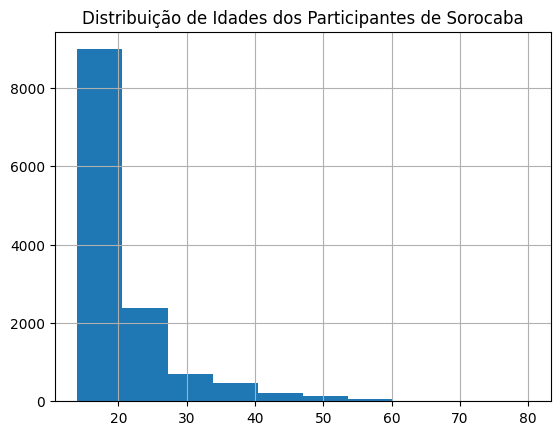

In [132]:
dados_sorocaba.Idade.hist(bins=10)
plt.title('Distribuição de Idades dos Participantes de Sorocaba')
plt.show()
#hist: cria um  grafico 
#bins: quantidade de barras (colunas)
#title: título do gráfico  
#show: mostra o gráfico

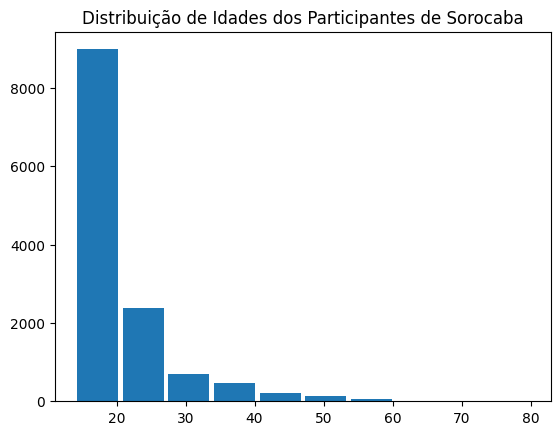

In [133]:
plt.hist(dados_sorocaba.Idade, bins=10, rwidth=0.9)
plt.title('Distribuição de Idades dos Participantes de Sorocaba')
plt.show()
#rwidth: largura das barras
#mesma coisa porém sem a largura das barras

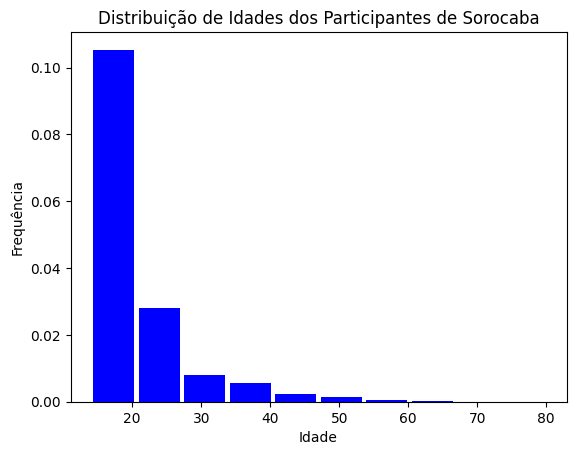

In [134]:
from matplotlib import colors
plt.hist(dados_sorocaba.Idade, bins=10, rwidth=0.9, color='Blue', density=True)
plt.title('Distribuição de Idades dos Participantes de Sorocaba')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()
#density: normaliza o histograma, ele mostra a frequência relativa
#xlabel: legenda do eixo x
#ylabel: legenda do eixo y
#color: cor do histograma

In [135]:
# Install Seaborn
%pip install seaborn

import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


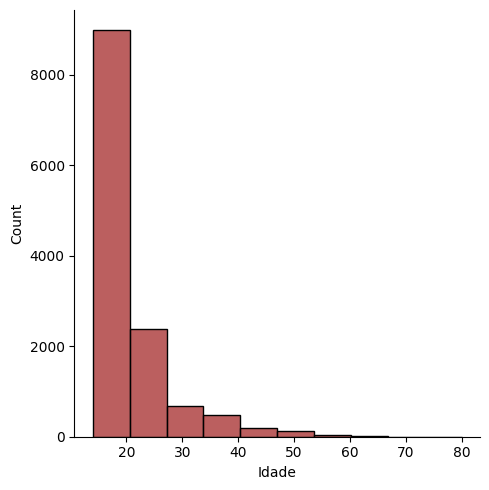

In [136]:
sns.displot(dados_sorocaba['Idade'], bins=10, color="brown", kde=False);
#displot: cria um gráfico de distribuição
#kde: kernel density estimation (estimativa de densidade do kernel)
#color: cor do gráfico
#bins: quantidade de barras (colunas)

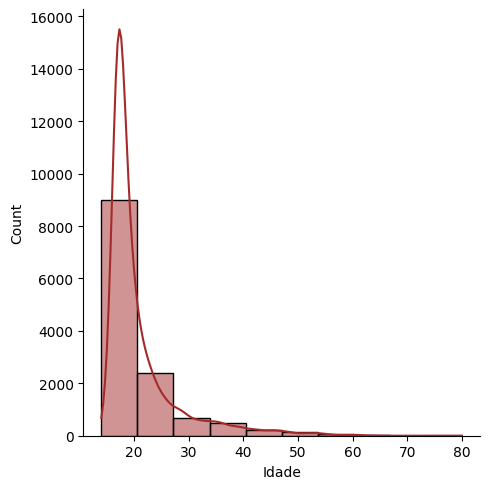

In [137]:
sns.displot(dados_sorocaba['Idade'], bins=10, color="brown", kde=True);
#kde: kernel density estimation (estimativa de densidade do kernel) ativado
#kde: mostra a linha da estimativa de densidade do kernel

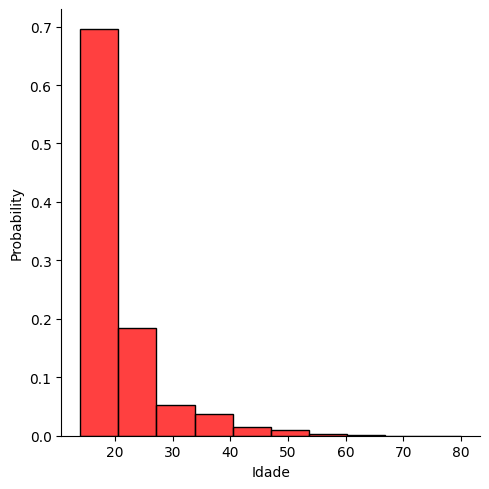

In [138]:
sns.displot(dados_sorocaba, x='Idade', bins=10, color="Red", kde=False, stat="probability");
#x: coluna que será analisada
#stat: estatística que será mostrada
#stat="probability": mostra a probabilidade


C:\Users\jp\AppData\Local\Temp\ipykernel_12672\1695813084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_campinas['Nota Ciências Humanas'] = pd.to_numeric(dados_campinas['Nota Ciências Humanas'], errors='coerce')


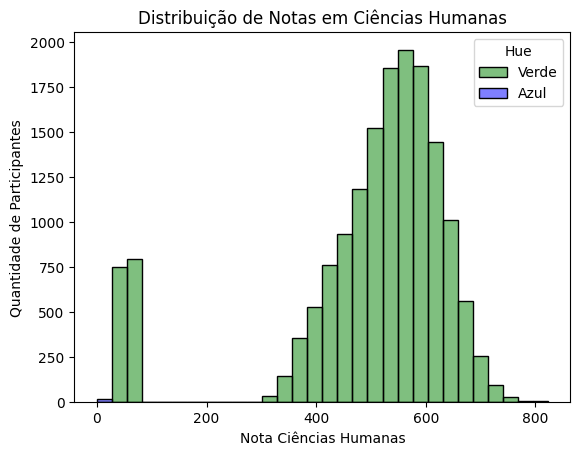

In [139]:
#convertendo a coluna 'Nota Ciências Humanas' para numérico
#caso tenha algum erro, ele será convertido para NaN
#pd.to_numeric: converte para numérico
dados_campinas['Nota Ciências Humanas'] = pd.to_numeric(dados_campinas['Nota Ciências Humanas'], errors='coerce')
#removendo os valores NaN
#dropna: remove valores nulos
#subset: coluna que será analisada
dados_campinas = dados_campinas.dropna(subset=['Nota Ciências Humanas'])

# cria uma nova coluna 'Hue' com a cor de acordo com a nota
# lambda: função anônima
# apply: aplica uma função a uma coluna

dados_campinas['Hue'] = dados_campinas['Nota Ciências Humanas'].apply(lambda x: 'Azul' if x == 0 else 'Verde')

sns.histplot(data=dados_campinas, x='Nota Ciências Humanas', bins=30, kde=False, hue='Hue', palette={'Azul': 'blue', 'Verde': 'green'})
plt.title('Distribuição de Notas em Ciências Humanas')
plt.xlabel('Nota Ciências Humanas')
plt.ylabel('Quantidade de Participantes')
plt.show()


#gera um gráfico de distribuição de notas em Ciências Humanas
#bins: quantidade de barras (colunas)
#color: cor do gráfico
#kde: kernel density estimation (estimativa de densidade do kernel) desativado
#title: título do gráfico
#xlabel: legenda do eixo x
#ylabel: legenda do eixo y
#hue: cor do gráfico de acordo com a nota
#palette: paleta de cores
#show: mostra o gráfico


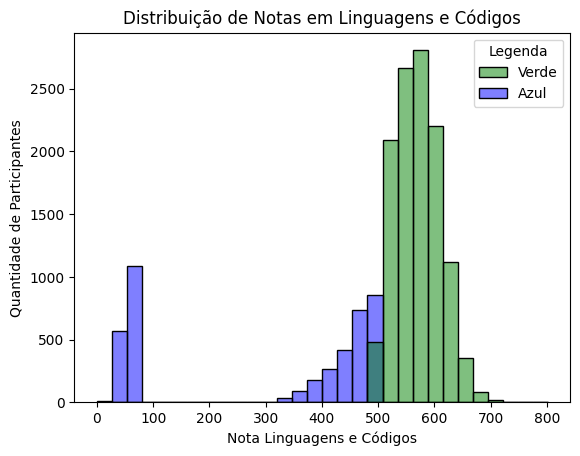

In [140]:
dados_campinas['Nota Linguagens e Códigos'] = pd.to_numeric(dados_campinas['Nota Linguagens e Códigos'], errors='coerce')
dados_campinas = dados_campinas.dropna(subset=['Nota Linguagens e Códigos'])

dados_campinas['Legenda'] = dados_campinas['Nota Linguagens e Códigos'].apply(lambda x: 'Azul' if x <= 500 else 'Verde')

sns.histplot(data=dados_campinas, x='Nota Linguagens e Códigos', bins=30, kde=False, hue='Legenda', palette={'Azul': 'blue', 'Verde': 'green'})
plt.title('Distribuição de Notas em Linguagens e Códigos')
plt.xlabel('Nota Linguagens e Códigos')
plt.ylabel('Quantidade de Participantes')
plt.show()

#diferente do outro grafico ele separa as notas em duas categorias, azul e verde
#azul para notas menores ou iguais a 500 e verde para notas maiores que 500


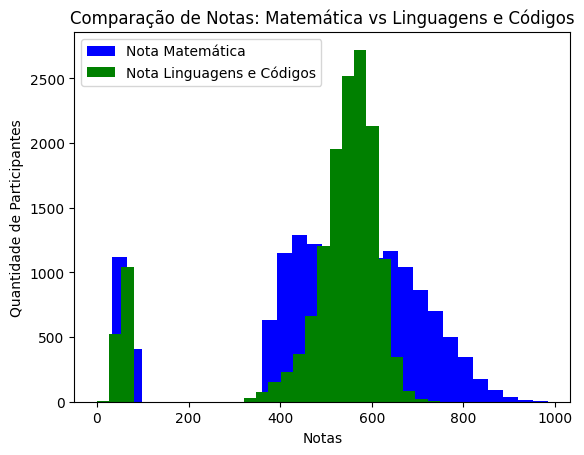

In [144]:
dados_campinas['Nota Matemática'] = pd.to_numeric(dados_campinas['Nota Matemática'], errors='coerce')
dados_campinas = dados_campinas.dropna(subset=['Nota Matemática'])



plt.hist(dados_campinas['Nota Matemática'], bins=30, alpha=1, label='Nota Matemática', color='blue')
plt.hist(dados_campinas['Nota Linguagens e Códigos'], bins=30, alpha=1, label='Nota Linguagens e Códigos', color='green')
plt.title('Comparação de Notas: Matemática vs Linguagens e Códigos')
plt.xlabel('Notas')
plt.ylabel('Quantidade de Participantes')
plt.legend()
plt.show()

#gera um gráfico de comparação de notas de Matemática e Linguagens e Códigos
#bins: quantidade de barras (colunas)
#alpha: transparência das barras



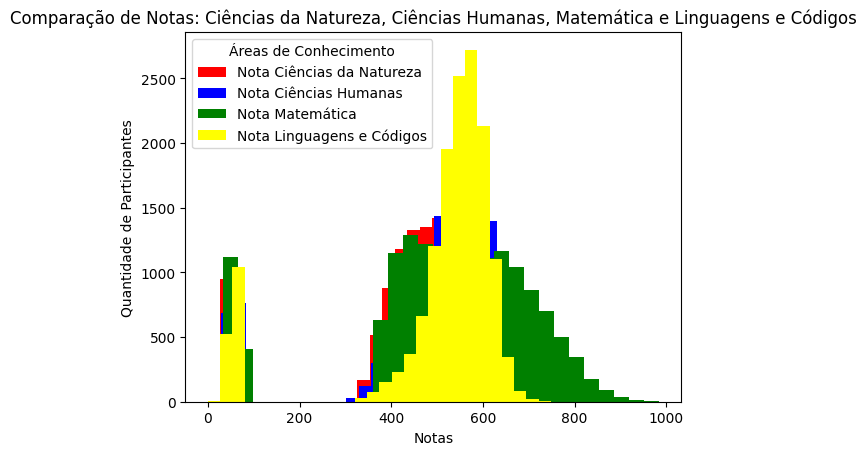

In [ ]:
dados_campinas['Nota Ciências da Natureza'] = pd.to_numeric(dados_campinas['Nota Ciências da Natureza'], errors='coerce')
dados_campinas = dados_campinas.dropna(subset=['Nota Ciências da Natureza'])


plt.hist(dados_campinas['Nota Ciências da Natureza'], bins=30, alpha=1, label='Nota Ciências da Natureza', color='red')
plt.hist(dados_campinas['Nota Ciências Humanas'], bins=30, alpha=1, label='Nota Ciências Humanas', color='blue')
plt.hist(dados_campinas['Nota Matemática'], bins=30, alpha=1, label='Nota Matemática', color='green')
plt.hist(dados_campinas['Nota Linguagens e Códigos'], bins=30, alpha=1, label='Nota Linguagens e Códigos', color='yellow')

plt.title('Comparação de Notas: Ciências da Natureza, Ciências Humanas, Matemática e Linguagens e Códigos')
plt.xlabel('Notas')
plt.ylabel('Quantidade de Participantes')
plt.legend(title= 'Áreas de Conhecimento')
plt.show()

#gera um gráfico de comparação de notas de todas as áreas de conhecimento
#legend: legenda do gráfico
#obs: colocar o label em cada plot para que a legenda apareça


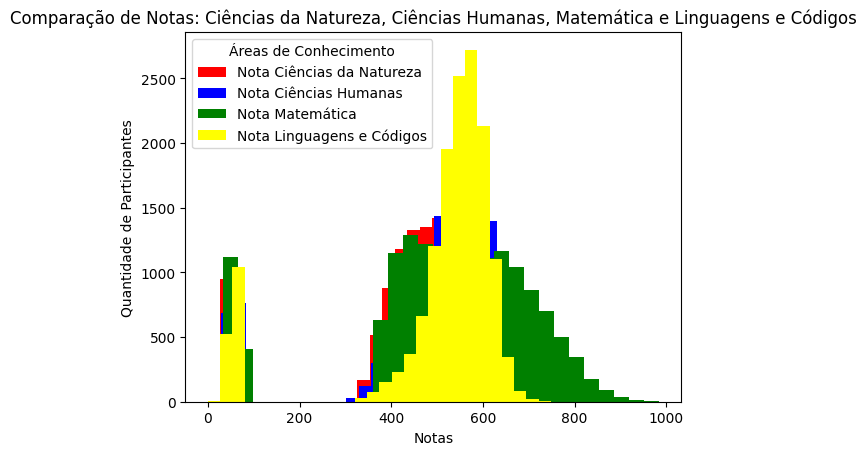

In [ ]:

plt.hist(dados_campinas['Nota Ciências da Natureza'], bins=30, alpha=1, label='Nota Ciências da Natureza', color='red', histtype='stepfilled')
plt.hist(dados_campinas['Nota Ciências Humanas'], bins=30, alpha=1, label='Nota Ciências Humanas', color='blue', histtype='stepfilled')
plt.hist(dados_campinas['Nota Matemática'], bins=30, alpha=1, label='Nota Matemática', color='green', histtype='stepfilled')
plt.hist(dados_campinas['Nota Linguagens e Códigos'], bins=30, alpha=1, label='Nota Linguagens e Códigos', color='yellow', histtype='stepfilled')

plt.title('Comparação de Notas: Ciências da Natureza, Ciências Humanas, Matemática e Linguagens e Códigos')
plt.xlabel('Notas')
plt.ylabel('Quantidade de Participantes')
plt.legend(title= 'Áreas de Conhecimento')
plt.show()

#stepfilled: preenche as barras com a cor
#histtype: tipo do histograma
#o histtype tem que ser igual para todos os plots para que o gráfico fique uniforme
#ele tem suas funções como 'bar', 'barstacked', 'step', 'stepfilled'// o bar é o padrão// o step é um gráfico de linha// o stepfilled é um gráfico de linha preenchido// o barstacked é um gráfico de barras empilhadas

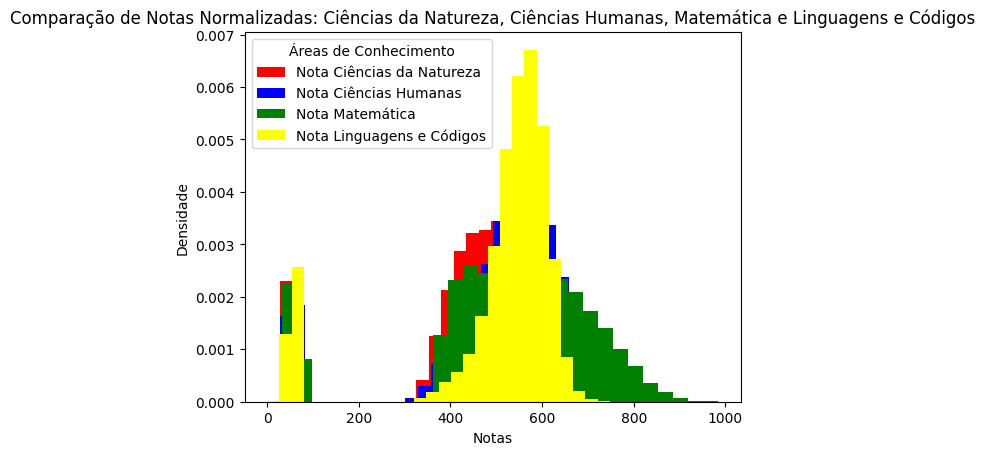

In [ ]:
plt.hist(dados_campinas['Nota Ciências da Natureza'], bins=30, alpha=1, label='Nota Ciências da Natureza', color='red', histtype='stepfilled', density=True)
plt.hist(dados_campinas['Nota Ciências Humanas'], bins=30, alpha=1, label='Nota Ciências Humanas', color='blue', histtype='stepfilled', density=True)
plt.hist(dados_campinas['Nota Matemática'], bins=30, alpha=1, label='Nota Matemática', color='green', histtype='stepfilled', density=True)
plt.hist(dados_campinas['Nota Linguagens e Códigos'], bins=30, alpha=1, label='Nota Linguagens e Códigos', color='yellow', histtype='stepfilled', density=True)

plt.title('Comparação de Notas Normalizadas: Ciências da Natureza, Ciências Humanas, Matemática e Linguagens e Códigos')
plt.xlabel('Notas')
plt.ylabel('Densidade')
plt.legend(title='Áreas de Conhecimento')
plt.show()


#aqui mudamos a densidade para True, isso faz com que o gráfico mostre a densidade de cada área de conhecimento, a densiade nesse caso se refere a nota de cada área de conhecimento
#densidade: normaliza o histograma, ele mostra a frequência relativa

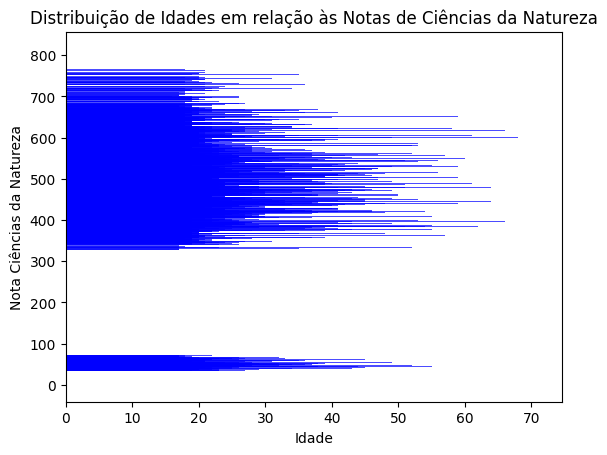

In [150]:
plt.barh(dados_campinas['Nota Ciências da Natureza'], dados_campinas['Idade'], color='blue', alpha=0.7)
plt.title('Distribuição de Idades em relação às Notas de Ciências da Natureza')
plt.xlabel('Idade')
plt.ylabel('Nota Ciências da Natureza')
plt.show()

# barh: cria um gráfico de barras horizontais
# xlabel: legenda do eixo X
# ylabel: legenda do eixo Y